### Problem 1: Building Intelligent Agent.
To build an intelligent agent that can understand the context of social media posts, analyze content, find popularity, and identify trends from posts containing texts, images, videos, and other data types, the following steps can be followed:

1. Data Collection:
   - Gathering a diverse dataset of social media posts from various platforms (e.g., Twitter, Facebook, Instagram). Using APIs, web scraping, or data providers to collect the data.
   - Collecting posts that include texts, images, videos, and any other relevant data types.
   - Inclusion of metadata such as timestamps, user information, and engagement metrics (likes, shares, comments) to capture popularity.

2. Data Preprocessing:
   - For text data Perform we can use text preprocessing techniques like removing special characters, punctuation, and stopwords. Normalize the text by lowercasing and applying stemming or lemmatization if required.
   - For images and videos,we can preprocess the data by resizing, normalizing, and augmenting (e.g., rotation, flipping).
   - We can extract features from images using techniques like CNNs or pre-trained models such as ResNet or VGGNet.

3. Integration of Data Types:
   - We have to decide on the approach for integrating different data types (text, images, videos) into a single representation.
   - One approach is to use a multi-modal architecture where each data type has separate input channels, and their outputs are merged. We can use VATT which is a Transformers for Multimodal Self-Supervised Learning.
   - Alternatively, we can use separate models for each data type and combine their outputs for analysis.

4. Feature Extraction:
   - We can Explore and extract additional features from the data that may be relevant for analysis.
   - For text data, consider features like word embeddings, sentiment scores, or topic modeling.
   - For image and video data, extract visual features such as color histograms, texture features, or object detection features.

5. Model Selection and Architecture Design:
   - Choose appropriate machine learning models or ensemble of models based on the problem requirements.
   - For text analysis, models like RNNs, LSTMs, or transformer models (e.g., BERT, GPT) can be considered.
   - For image and video analysis, CNNs and deep learning architectures like ResNet, InceptionNet, or pre-trained models (e.g., ImageNet) can be utilized.

6. Model Training and Validation:
   - Split the dataset into training, validation, and testing sets.
   - Train the selected model(s) on the training data and fine-tune the hyperparameters using the validation set.
   - Monitor and optimize the model's performance metrics (e.g., accuracy, F1-score) during training and validation.

7. Model Evaluation and Tuning:
   - Evaluate the trained model(s) on the testing set to measure its performance in real-world scenarios.
   - Analyze the results and fine-tune the model if necessary, by adjusting hyperparameters, trying different architectures, or incorporating additional features.

8. Deployment and Integration:
   - Deploy the trained model as an intelligent agent that can process new social media posts in real-time.
   - Integrate the agent into the business team's workflow, allowing them to use it for content segmentation, trend analysis, popularity assessment, and other relevant tasks.

9. Continuous Improvement:
   - Continuously monitor the agent's performance and collect feedback from users.
   - Incorporate user feedback, adapt to changing social media trends, and update the model regularly to ensure its effectiveness.

By following these steps, we can build an intelligent agent capable of understanding social media post context, analyzing content, identifying trends, and determining popularity across multiple data types.

### Problem 2: Image Classification

In [9]:
# Download the dataset
!gdown --id  1eADu_WmxwhBVwZX4AGKPdkw17bOToP99


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1eADu_WmxwhBVwZX4AGKPdkw17bOToP99
To: /content/dataset_256X256.zip
100% 365M/365M [00:05<00:00, 69.7MB/s]


In [10]:
from zipfile import ZipFile
with ZipFile('/content/dataset_256X256.zip', 'r') as zipObj:
  zipObj.extractall('data')

## Data Preprocessing along with Augmentation 

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
TRAINING_DIR = "/content/data/dataset_256X256/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/data/dataset_256X256/test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=40
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=40
)

Found 4800 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.


In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_filepath = '/content/model_1.h5'
checkpoint_1 = ModelCheckpoint(
    filepath = model_filepath,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True,
    verbose = 1
)

### Model 1:


In [15]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D

base_model = InceptionV3(
    input_shape = (256,256,3),
    weights = 'imagenet',
    include_top = False
)

for layer in base_model.layers:
  layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(4, activation = 'softmax')(x)
model1 = Model(inputs= base_model.inputs, outputs = predictions)

In [16]:
model1.compile(optimizer ='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

In [17]:
history1 = model1.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 5, callbacks = [checkpoint_1]
)


Epoch 1/5
120/120 [==============================] - ETA: 0s - loss: 0.2709 - accuracy: 0.9075
Epoch 1: val_accuracy improved from -inf to 0.97125, saving model to /content/model_1.h5
120/120 [==============================] - 92s 729ms/step - loss: 0.2709 - accuracy: 0.9075 - val_loss: 0.0777 - val_accuracy: 0.9712
Epoch 2/5
120/120 [==============================] - ETA: 0s - loss: 0.1011 - accuracy: 0.9679
Epoch 2: val_accuracy improved from 0.97125 to 0.97500, saving model to /content/model_1.h5
120/120 [==============================] - 86s 718ms/step - loss: 0.1011 - accuracy: 0.9679 - val_loss: 0.0659 - val_accuracy: 0.9750
Epoch 3/5
120/120 [==============================] - ETA: 0s - loss: 0.0939 - accuracy: 0.9648
Epoch 3: val_accuracy improved from 0.97500 to 0.97938, saving model to /content/model_1.h5
120/120 [==============================] - 86s 714ms/step - loss: 0.0939 - accuracy: 0.9648 - val_loss: 0.0550 - val_accuracy: 0.9794
Epoch 4/5
120/120 [=====================

### Model 2:

In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D

base_model = VGG16(
    input_shape = (256,256,3),
    weights = 'imagenet',
    include_top = False
)

for layer in base_model.layers:
  layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(4, activation = 'softmax')(x)
model2 = Model(inputs= base_model.inputs, outputs = predictions)

58889256/58889256 [==============================] - 2s 0us/step


In [19]:
model2.compile(optimizer ='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_filepath = '/content/model_2.h5'
checkpoint_2 = ModelCheckpoint(
    filepath = model_filepath,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True,
    verbose = 1
)

In [21]:
history2 = model2.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 5, callbacks = [checkpoint_2]
)


Epoch 1/5
120/120 [==============================] - ETA: 0s - loss: 0.7469 - accuracy: 0.6971
Epoch 1: val_accuracy improved from -inf to 0.86187, saving model to /content/model_2.h5
120/120 [==============================] - 99s 762ms/step - loss: 0.7469 - accuracy: 0.6971 - val_loss: 0.3889 - val_accuracy: 0.8619
Epoch 2/5
120/120 [==============================] - ETA: 0s - loss: 0.4401 - accuracy: 0.8340
Epoch 2: val_accuracy improved from 0.86187 to 0.91125, saving model to /content/model_2.h5
120/120 [==============================] - 91s 760ms/step - loss: 0.4401 - accuracy: 0.8340 - val_loss: 0.2654 - val_accuracy: 0.9112
Epoch 3/5
120/120 [==============================] - ETA: 0s - loss: 0.3689 - accuracy: 0.8617
Epoch 3: val_accuracy improved from 0.91125 to 0.92000, saving model to /content/model_2.h5
120/120 [==============================] - 90s 753ms/step - loss: 0.3689 - accuracy: 0.8617 - val_loss: 0.2377 - val_accuracy: 0.9200
Epoch 4/5
120/120 [=====================

### Plotting matrices

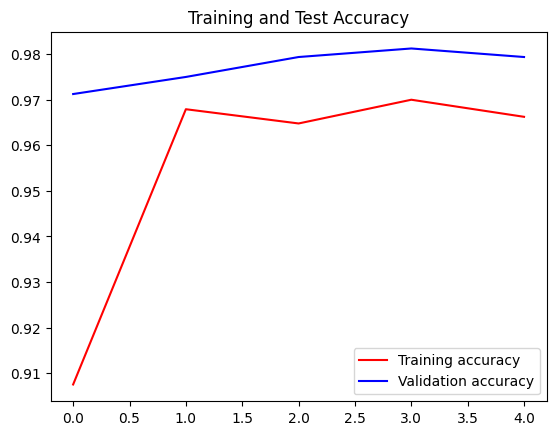

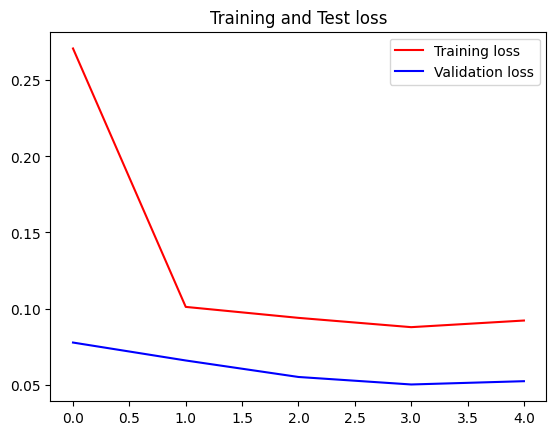

In [22]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title("Training and Test Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and Test loss")
plt.legend()

plt.show()

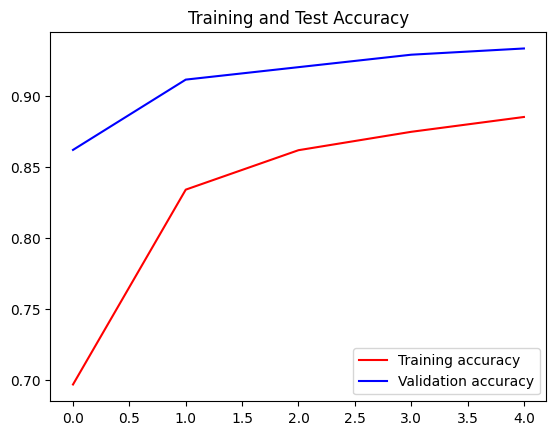

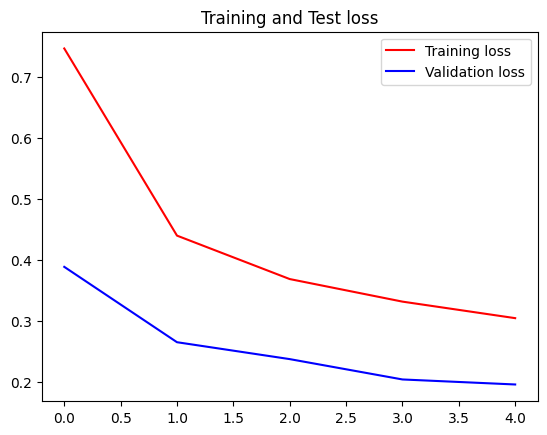

In [23]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title("Training and Test Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and Test loss")
plt.legend()

plt.show()

## Prove that your model is not overfitted
- 1. **Applying Data Augmentaion:** Data augmentation expands the training dataset by applying transformations or perturbations to the data. It increases dataset size, introduces variations, and improves generalization. By regularizing the model, it reduces overfitting, enhances robustness, and prevents reliance on specific examples. Data augmentation helps the model capture more generalized patterns and handle unseen data better, mitigating overfitting in machine learning models.
- 2. **Validation accuracy is greater than Training accuracy: ** When the validation accuracy is greater than the training accuracy, it suggests that the model is likely not overfitting. If the model has sufficient capacity to learn complex patterns in the data, it can achieve higher accuracy on unseen validation data compared to the training set.

### Ensemble Model

In [24]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

model_1 = load_model('/content/model_1.h5')
model_1 = Model(inputs = model_1.inputs,
                outputs = model_1.outputs,
                name = 'name_of_model_1')


model_2 = load_model('/content/model_2.h5')
model_2 = Model(inputs = model_2.inputs,
                outputs = model_2.outputs,
                name = 'name_of_model_2')

models = [model_1, model_2]
model_input = Input(shape = (256,256,3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs = model_input,
                outputs = ensemble_output,
                name = 'ensemble')



In [25]:
ensemble_model.compile(optimizer ='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_filepath = '/content/ensemble_model.h5'
checkpoint = ModelCheckpoint(
    filepath = model_filepath,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True,
    verbose = 1
)

In [27]:
history = ensemble_model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 5, callbacks = [checkpoint]
)


Epoch 1/5
120/120 [==============================] - ETA: 0s - loss: 0.1534 - accuracy: 0.9673
Epoch 1: val_accuracy improved from -inf to 0.98563, saving model to /content/ensemble_model.h5
120/120 [==============================] - 108s 849ms/step - loss: 0.1534 - accuracy: 0.9673 - val_loss: 0.0869 - val_accuracy: 0.9856
Epoch 2/5
120/120 [==============================] - ETA: 0s - loss: 0.1459 - accuracy: 0.9663
Epoch 2: val_accuracy did not improve from 0.98563
120/120 [==============================] - 100s 833ms/step - loss: 0.1459 - accuracy: 0.9663 - val_loss: 0.0928 - val_accuracy: 0.9837
Epoch 3/5
120/120 [==============================] - ETA: 0s - loss: 0.1383 - accuracy: 0.9675
Epoch 3: val_accuracy did not improve from 0.98563
120/120 [==============================] - 99s 822ms/step - loss: 0.1383 - accuracy: 0.9675 - val_loss: 0.1081 - val_accuracy: 0.9769
Epoch 4/5
120/120 [==============================] - ETA: 0s - loss: 0.1349 - accuracy: 0.9696
Epoch 4: val_accur

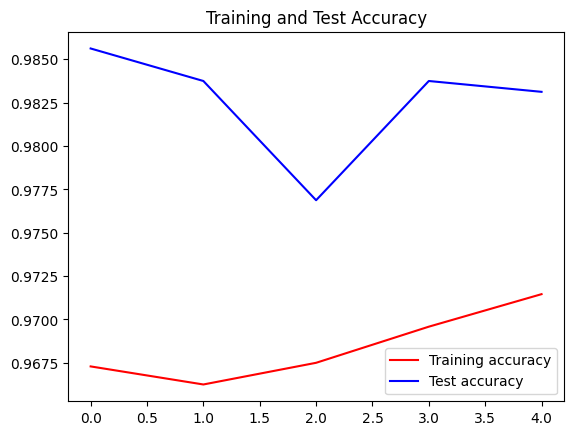

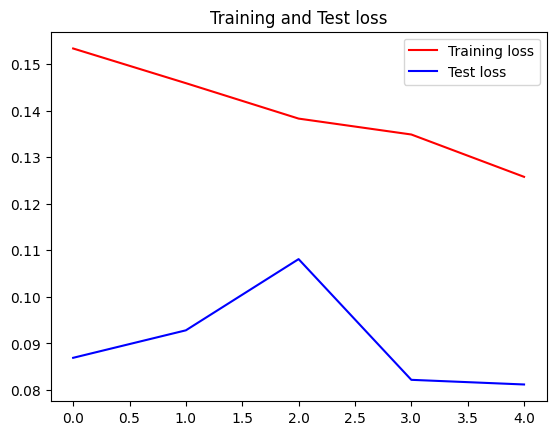

In [28]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Test accuracy')
plt.title("Training and Test Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Test loss')
plt.title("Training and Test loss")
plt.legend()

plt.show()

## Problem 3: Island Count

In [29]:
def count_islands(grid):
    if not grid:
        return 0

    rows = len(grid)
    cols = len(grid[0])
    count = 0

    def dfs(row, col):
        if row < 0 or row >= rows or col < 0 or col >= cols or grid[row][col] != '1':
            return

        grid[row][col] = '#'  # Mark the current land as visited

        # Recursively visit all neighboring lands
        dfs(row - 1, col)  # Up
        dfs(row + 1, col)  # Down
        dfs(row, col - 1)  # Left
        dfs(row, col + 1)  # Right

    for row in range(rows):
        for col in range(cols):
            if grid[row][col] == '1':
                count += 1
                dfs(row, col)

    return count


In [30]:

# Example usage:
grid1 = [
    ['1', '1', '1', '1', '0'],
    ['1', '1', '0', '1', '0'],
    ['1', '1', '0', '0', '0'],
    ['0', '0', '0', '0', '0']
]
print(count_islands(grid1))  # Expected Output: 1

grid2 = [
    ['1', '1', '0', '0', '0'],
    ['1', '1', '0', '0', '0'],
    ['0', '0', '1', '0', '0'],
    ['0', '0', '0', '1', '1']
]
print(count_islands(grid2))  # Expected Output: 3


1
3
